# 데이터 로드

In [ ]:
# 필요한 라이브러리 호출

# 기초
import numpy as np
import pandas as pd
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from plotly import express as px

# 사이킷런 분류
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# 스케일링
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# 지도학습

# 회귀 종류
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# 분류 종류
# from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree



# 비지도학습
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 경고메시지 무시
import warnings
warnings.filterwarnings(action='ignore') 
# 평가용
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
import matplotlib.pyplot as plt
# 한글화 작업
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
# # 잠깐 시각화
# plt.figure(figsize=(12,7))

# sns.countplot(data=df_19.head(6).sort_values(by = '품목 번호', ascending = True))

In [ ]:
df_19 = pd.read_csv('C:/myPyCode/data/2021_물가/생필품 농수축산물 가격 정보(2019년).csv', encoding = 'cp949')
df_19

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1496335,116,홈플러스 시흥점,311,오이(다다기),1개,1190,2019-12,국산,2,대형마트,545000,금천구,2019-12-30
1,1499702,115,남문시장,202,돼지고기(생삼겹살),1등급(600g),12500,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
2,1503366,115,남문시장,310,상추(100g),1개,800,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
3,1499701,115,남문시장,58,"쇠고기(한우,불고기)",1등급(600g),23000,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
4,1503365,115,남문시장,309,양파(1.5kg망),1개,2500,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113487,1359195,202,구로시장,312,애호박,1개,1500,2019-01,국내산,1,전통시장,530000,구로구,2019-01-28
113488,1357693,73,뚝도시장,306,"배(신고, 600g)",1개,3900,2019-01,NaN,1,전통시장,200000,성동구,2019-01-28
113489,1359189,202,구로시장,306,"배(신고, 600g)",1개,3500,2019-01,국내산,1,전통시장,530000,구로구,2019-01-28
113490,1357694,73,뚝도시장,307,배추(2.5~3kg),1포기,2500,2019-01,NaN,1,전통시장,200000,성동구,2019-01-28


In [ ]:
df_21 = pd.read_csv('C:/myPyCode/data/2021_물가/생필품_농수축산물_가격_정보(2021년).csv', encoding = 'cp949')
df_21

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1636107,226,롯데마트 구로점,28,사과,1개 (300g),1598,2021-01,"국내산,부사",2,대형마트,530000,구로구,2021-01-21
1,1636108,226,롯데마트 구로점,27,배,1개 (600g),1590,2021-01,"국내산,신고",2,대형마트,530000,구로구,2021-01-21
2,1636109,226,롯데마트 구로점,26,배추,1포기(2kg),3990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
3,1636110,226,롯데마트 구로점,25,무,1개 (900g),1990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
4,1636111,226,롯데마트 구로점,24,양파,1개 (200g),990,2021-01,국내산,2,대형마트,530000,구로구,2021-01-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89894,1724775,154,홈플러스 강동점,320,달걀(30개),특란,6490,2021-12,국내산,2,대형마트,740000,강동구,2021-12-30
89895,1724776,154,홈플러스 강동점,144,"조기(국산,냉동)",1마리,1190,2021-12,국내산3마리3570,2,대형마트,740000,강동구,2021-12-30
89896,1724777,154,홈플러스 강동점,264,"명태(냉동,수입산)",1마리,3490,2021-12,수입산(러시아),2,대형마트,740000,강동구,2021-12-30
89897,1724778,154,홈플러스 강동점,256,"오징어(냉동,국산)",1마리,4980,2021-12,국내산,2,대형마트,740000,강동구,2021-12-30


In [ ]:
df_20 = pd.read_csv('C:/myPyCode/data/2021_물가/생필품 농수축산물 가격 정보(2020년).csv', encoding = 'cp949')
df_20

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1621162,1,통인시장,309,양파(1.5kg망),1kg,2000,2020-12,"국내산,무안",1,전통시장,110000,종로구,2020-12-21
1,1628949,228,방배종합시장,277,호박,1개268g,1500,2020-12,국내산/인큐베이터,1,전통시장,650000,서초구,2020-12-21
2,1626799,51,NC백화점 불광점,18,닭고기,1마리(1kg),8990,2020-12,올품 토종,2,대형마트,380000,은평구,2020-12-21
3,1630920,223,홈플러스 목동점,278,쇠고기,600g,35982,2020-12,국내산(음성)농협,2,대형마트,470000,양천구,2020-12-21
4,1622882,1,통인시장,309,양파(1.5kg망),1kg,2000,2020-12,"국내산,무안",1,전통시장,110000,종로구,2020-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117447,1509343,68,롯데백화점 미아점,306,"배(신고, 600g)",1개,4000,2020-01,NaN,2,대형마트,305000,강북구,2020-01-23
117448,1509368,206,하나로클럽 미아점,99,돼지고기(생삼겹살),600g,9300,2020-01,100g 1550,2,대형마트,305000,강북구,2020-01-23
117449,1509346,68,롯데백화점 미아점,309,양파(1.5kg망),1.5kg,3980,2020-01,NaN,2,대형마트,305000,강북구,2020-01-23
117450,1509369,206,하나로클럽 미아점,275,닭고기(중간),1마리,4670,2020-01,NaN,2,대형마트,305000,강북구,2020-01-23


# 데이터 전처리 시작

In [ ]:
df_one = pd.merge(df_19, df_20, how = 'outer')

In [ ]:
df_two = pd.merge(df_one, df_21, how = 'outer')

In [ ]:
df = df_two
df

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1496335,116,홈플러스 시흥점,311,오이(다다기),1개,1190,2019-12,국산,2,대형마트,545000,금천구,2019-12-30
1,1499702,115,남문시장,202,돼지고기(생삼겹살),1등급(600g),12500,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
2,1503366,115,남문시장,310,상추(100g),1개,800,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
3,1499701,115,남문시장,58,"쇠고기(한우,불고기)",1등급(600g),23000,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
4,1503365,115,남문시장,309,양파(1.5kg망),1개,2500,2019-12,국산,1,전통시장,545000,금천구,2019-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320838,1724775,154,홈플러스 강동점,320,달걀(30개),특란,6490,2021-12,국내산,2,대형마트,740000,강동구,2021-12-30
320839,1724776,154,홈플러스 강동점,144,"조기(국산,냉동)",1마리,1190,2021-12,국내산3마리3570,2,대형마트,740000,강동구,2021-12-30
320840,1724777,154,홈플러스 강동점,264,"명태(냉동,수입산)",1마리,3490,2021-12,수입산(러시아),2,대형마트,740000,강동구,2021-12-30
320841,1724778,154,홈플러스 강동점,256,"오징어(냉동,국산)",1마리,4980,2021-12,국내산,2,대형마트,740000,강동구,2021-12-30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320843 entries, 0 to 320842
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   일련번호               320843 non-null  int64 
 1   시장/마트 번호           320843 non-null  int64 
 2   시장/마트 이름           320843 non-null  object
 3   품목 번호              320843 non-null  int64 
 4   품목 이름              320787 non-null  object
 5   실판매규격              320843 non-null  object
 6   가격(원)              320843 non-null  int64 
 7   년도-월               320843 non-null  object
 8   비고                 253682 non-null  object
 9   시장유형 구분(시장/마트) 코드  320843 non-null  int64 
 10  시장유형 구분(시장/마트) 이름  320843 non-null  object
 11  자치구 코드             320843 non-null  int64 
 12  자치구 이름             320843 non-null  object
 13  점검일자               320843 non-null  object
dtypes: int64(6), object(8)
memory usage: 36.7+ MB


In [ ]:
df.describe()

,일련번호,시장/마트 번호,품목 번호,가격(원),시장유형 구분(시장/마트) 코드,자치구 코드
count,3.208430e+05,320843.000000,320843.000000,3.208430e+05,320843.000000,320843.000000
mean,1.556445e+06,103.142671,212.581568,1.346572e+04,1.510072,415991.341560
std,9.823942e+04,68.695718,109.217373,4.227410e+06,0.499899,185545.761174
min,1.357080e+06,1.000000,13.000000,0.000000e+00,1.000000,110000.000000
25%,1.473784e+06,44.000000,119.000000,2.000000e+03,1.000000,260000.000000
50%,1.560484e+06,92.000000,265.000000,3.450000e+03,2.000000,410000.000000
75%,1.641340e+06,146.000000,307.000000,5.950000e+03,2.000000,560000.000000
max,1.724779e+06,229.000000,324.000000,2.394024e+09,2.000000,740000.000000


In [ ]:
# 아래부터 시장유형 구분 이름, 자치구 이름, 품목 이름, 시장/마트 이름을 남기기 위해
# 딕셔너리 제작 시작
mart_name = df['시장유형 구분(시장/마트) 코드']
mart_code = df['시장유형 구분(시장/마트) 이름']
mart = {}
for i in range(len(mart_code)):
      mart[mart_code[i]] = mart_name[i]
print(mart)

region_name = df['자치구 이름']
region_code = df['자치구 코드']
region = {}
for i in range(len(region_code)):
      region[region_code[i]] = region_name[i]
print(region)

cat_name = df['품목 이름']
cat_code = df['품목 번호']
cat = {}
for i in range(len(cat_code)):
      cat[cat_code[i]] = cat_name[i]
print(cat)

market_name = df['시장/마트 이름']
market_code = df['시장/마트 번호']
market = {}
for i in range(len(market_code)):
      market[market_code[i]] = market_name[i]
print(market)

{'대형마트': 2, '전통시장': 1}


In [ ]:
region_name = df['자치구 이름']
region_code = df['자치구 코드']
region = {}
for i in range(len(region_code)):
      region[region_code[i]] = region_name[i]
print(region)

{545000: '금천구', 680000: '강남구', 560000: '영등포구', 740000: '강동구', 410000: '서대문구', 230000: '동대문구', 500000: '강서구', 440000: '마포구', 140000: '중구', 305000: '강북구', 710000: '송파구', 260000: '중랑구', 215000: '광진구', 320000: '도봉구', 590000: '동작구', 170000: '용산구', 470000: '양천구', 290000: '성북구', 650000: '서초구', 530000: '구로구', 620000: '관악구', 350000: '노원구', 110000: '종로구', 200000: '성동구', 380000: '은평구'}


In [ ]:
cat_name = df['품목 이름']
cat_code = df['품목 번호']
cat = {}
for i in range(len(cat_code)):
      cat[cat_code[i]] = cat_name[i]
print(cat)

{311: '오이(다다기)', 202: '돼지고기(생삼겹살)', 310: '상추(100g)', 58: '쇠고기(한우,불고기)', 309: '양파(1.5kg망)', 119: '호박(인큐베이터)', 260: '조기(냉동,수입산)', 283: '닭고기(육계)', 171: '달걀(10개)', 320: '달걀(30개)', 136: '조기(국산,생물)', 264: '명태(냉동,수입산)', 318: '고등어(30cm,수입산)', 305: '사과(부사, 300g)', 254: '오징어(생물,국산)', 266: '고등어(생물,국산)', 152: '명태(러시아,냉동)', 306: '배(신고, 600g)', 308: '무(1kg)', 307: '배추(2.5~3kg)', 312: '애호박', 144: '조기(국산,냉동)', 268: '고등어(냉동,국산)', 248: '배(신고),중급(대)', 125: '배추(국산)', 26: '배추', 24: '양파', 25: '무', 276: '배(신고)', 303: '조기', 288: '동태', 23: '상추', 256: '오징어(냉동,국산)', 13: '고등어', 27: '배', 257: '오징어(냉동,수입산)', 52: '돼지고기(삼겹살)', 18: '닭고기', 285: '돼지고기', 131: nan, 50: '사과(부사)', 277: '호박', 138: '닭고기(토종닭)', 99: '돼지고기(생삼겹살)', 244: '사과(부사),중급(대)', 269: '고등어(냉동,수입산)', 259: '조기(냉동,국산)', 271: '배추(중간)', 284: '배(중품)', 22: '오이', 304: '고등어', 314: '냉동참조기(20cm,국산)', 265: '명태(생물,수입산)', 253: '오징어', 302: '명태', 17: '달걀', 278: '쇠고기', 282: '무(세척무)', 175: '배추(중간)', 274: '무(세척무, 중)', 261: '조기(생물,수입산)', 316: '고등어(30cm,국산)', 118: '호박(인큐베이터),중간

In [ ]:
market_name = df['시장/마트 이름']
market_code = df['시장/마트 번호']
market = {}
for i in range(len(market_code)):
      market[market_code[i]] = market_name[i]
print(market)

{116: '홈플러스 시흥점', 115: '남문시장', 114: '현대시장', 222: '홈플러스 독산점', 44: '이마트 역삼점', 130: '롯데백화점 영등포점', 154: '홈플러스 강동점', 31: '인왕시장', 88: '롯데백화점 청량리점', 45: '롯데백화점 강남점', 213: '화곡본동시장', 123: '홈플러스 월드컵점', 8: '롯데마트 서울역점', 66: '수유재래시장', 153: '이마트 명일점', 147: '롯데백화점 잠실점', 91: '동원시장', 40: '홈플러스 등촌점', 80: '이마트 자양점', 27: '이마트 창동점', 127: '남성시장', 10: '용문시장', 102: '목3동시장', 214: '이마트 목동점', 90: '우림시장', 13: '돈암제일시장', 217: '방림시장', 120: '망원시장', 151: '암사종합시장', 28: '홈플러스 방학점', 22: '이마트 여의도점', 19: '대림중앙시장', 56: '롯데백화점', 218: '신세계백화점 강남점', 108: '남구로시장', 140: '하나로클럽 양재점', 133: '원당종합시장', 25: '방학동도깨비시장', 33: '현대백화점 신촌점', 11: '남대문시장', 103: '신영시장', 96: '공릉동 도깨비시장', 82: '롯데마트 강변점', 32: '영천시장', 148: '홈플러스 잠실점', 1: '통인시장', 26: '신창시장', 2: '신세계백화점', 129: '태평백화점', 206: '하나로클럽 미아점', 15: '이마트 미아점', 136: '세이브 마트', 94: '홈플러스 면목점', 60: '이마트 청계점', 20: '영등포전통시장', 216: '도곡시장', 145: '마천중앙시장', 134: '신원시장(신림1동)', 21: '홈플러스 영등포점', 207: '관악신사시장(신림4동)', 215: '청담삼익시장', 74: '이마트 왕십리점', 38: '송화시장', 200: '뉴코아아울렛 강남점', 14: '장위골목시장', 6: '이마트 용산점',

## 필요 데이터 확인

In [ ]:
df['가격(원)'].value_counts().head(20) # 가격이 0원인 행 삭제 예정

3000    15383
2000    13706
2500    12974
4000    12420
5000    10549
1000     9691
3500     8389
1500     8247
6000     6038
2980     4436
4500     4094
500      3911
3980     3812
0        3694
1980     3678
6500     3211
5500     3188
4980     3097
2990     2684
3990     2586
Name: 가격(원), dtype: int64

In [ ]:
df['품목 이름'].isnull().sum() # 결측치 확인

56

In [ ]:
# 아래부터 필요없는 열 제거 예정
# 주의
df.drop(['시장유형 구분(시장/마트) 이름','시장유형 구분(시장/마트) 코드'], axis = 1, inplace = True)
df.drop(['자치구 이름','시장/마트 이름'],axis=1, inplace = True)
df.drop(['점검일자','실판매규격','품목 이름','비고','일련번호'], axis = 1, inplace = True)

In [ ]:
# df.drop(['자치구 이름','시장/마트 이름'],axis=1, inplace = True)

In [ ]:
# df.drop(['점검일자','실판매규격','품목 이름','비고','일련번호'], axis = 1, inplace = True)

In [ ]:
# df.drop('일련번호', axis = 1, inplace = True)

In [ ]:
df # drop된 내용 확인

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
0,116,311,1190,2019-12,545000
1,115,202,12500,2019-12,545000
2,115,310,800,2019-12,545000
3,115,58,23000,2019-12,545000
4,115,309,2500,2019-12,545000
...,...,...,...,...,...
320838,154,320,6490,2021-12,740000
320839,154,144,1190,2021-12,740000
320840,154,264,3490,2021-12,740000
320841,154,256,4980,2021-12,740000


In [ ]:
df['가격(원)'].value_counts().head(20)

3000    15383
2000    13706
2500    12974
4000    12420
5000    10549
1000     9691
3500     8389
1500     8247
6000     6038
2980     4436
4500     4094
500      3911
3980     3812
0        3694
1980     3678
6500     3211
5500     3188
4980     3097
2990     2684
3990     2586
Name: 가격(원), dtype: int64

In [ ]:
# 가격이 0원인 행 sort시켜서 다시 선언
df = df.sort_values(by='가격(원)')
df

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
234816,147,302,0,2021-01,710000
222105,154,264,0,2020-01,740000
180372,44,288,0,2020-07,680000
111459,129,152,0,2019-02,590000
180353,44,288,0,2020-07,680000
...,...,...,...,...,...
148594,10,256,310000,2020-10,170000
25965,94,306,403890,2019-11,260000
139423,223,288,34902990,2020-10,470000
127610,214,13,35002980,2020-11,470000


In [ ]:
# 가격이 0원인 상품, 1원인 상품을 iloc로 삭제
df = df.sort_values(by='가격(원)')
df = df.iloc[3695:,:]

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
70063,213,119,10,2019-07,500000
261572,214,312,90,2021-05,470000
243730,102,25,100,2021-02,470000
65247,146,310,100,2019-08,710000
87660,114,311,100,2019-06,545000
...,...,...,...,...,...
148594,10,256,310000,2020-10,170000
25965,94,306,403890,2019-11,260000
139423,223,288,34902990,2020-10,470000
127610,214,13,35002980,2020-11,470000


In [ ]:
# 23억, 3500만원, 3490만원어치 상품 삭제 (outlier)
df = df.iloc[:317145]
df

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
70063,213,119,10,2019-07,500000
261572,214,312,90,2021-05,470000
243730,102,25,100,2021-02,470000
65247,146,310,100,2019-08,710000
87660,114,311,100,2019-06,545000
...,...,...,...,...,...
244208,45,50,210000,2021-02,680000
179632,40,58,260520,2020-07,500000
92710,63,58,288200,2019-05,170000
148594,10,256,310000,2020-10,170000


In [ ]:
# # 년도-월을 전부 월별로 바꾸기
# df['년도-월'] = pd.to_datetime(df['년도-월'])
# df['년도-월'] = df['년도-월'].dt.month

In [ ]:
# df.sort_values(by = '년도-월')

In [ ]:
# 년도-월을 전부 연도별로 바꾸기
df['년도-월'] = pd.to_datetime(df['년도-월'])
df['년도-월'] = df['년도-월'].dt.year

In [ ]:
df

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
70063,213,119,10,2019,500000
261572,214,312,90,2021,470000
243730,102,25,100,2021,470000
65247,146,310,100,2019,710000
87660,114,311,100,2019,545000
...,...,...,...,...,...
244208,45,50,210000,2021,680000
179632,40,58,260520,2020,500000
92710,63,58,288200,2019,170000
148594,10,256,310000,2020,170000


In [ ]:
df.isnull().sum() # 결측치 확인

시장/마트 번호    0
품목 번호       0
가격(원)       0
년도-월        0
자치구 코드      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317145 entries, 70063 to 25965
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   시장/마트 번호  317145 non-null  int64
 1   품목 번호     317145 non-null  int64
 2   가격(원)     317145 non-null  int64
 3   년도-월      317145 non-null  int64
 4   자치구 코드    317145 non-null  int64
dtypes: int64(5)
memory usage: 14.5 MB


In [ ]:
df.sort_values(by = '년도-월').tail(20)

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
261619,102,288,3000,2021,470000
286067,109,312,1500,2021,530000
278526,16,23,3000,2021,290000
286080,108,308,1500,2021,530000
261626,103,24,3000,2021,470000
307465,62,308,1500,2021,170000
303839,62,23,1000,2021,170000
257273,32,312,1000,2021,410000
241185,102,22,1000,2021,470000
261603,102,28,3000,2021,470000


In [ ]:
# df.replace('-', inplace = True)

In [ ]:
# 특수문자 삭제
# df["년도-월"] = df["년도-월"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
# df['년도-월'] = df['년도-월'].astype('int')

In [ ]:
df # 현재 데이터

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
70063,213,119,10,2019,500000
261572,214,312,90,2021,470000
243730,102,25,100,2021,470000
65247,146,310,100,2019,710000
87660,114,311,100,2019,545000
...,...,...,...,...,...
244208,45,50,210000,2021,680000
179632,40,58,260520,2020,500000
92710,63,58,288200,2019,170000
148594,10,256,310000,2020,170000


In [1]:
df['년도-월'].value_counts()

NameError: ignored

## 전처리 종료. 시각화

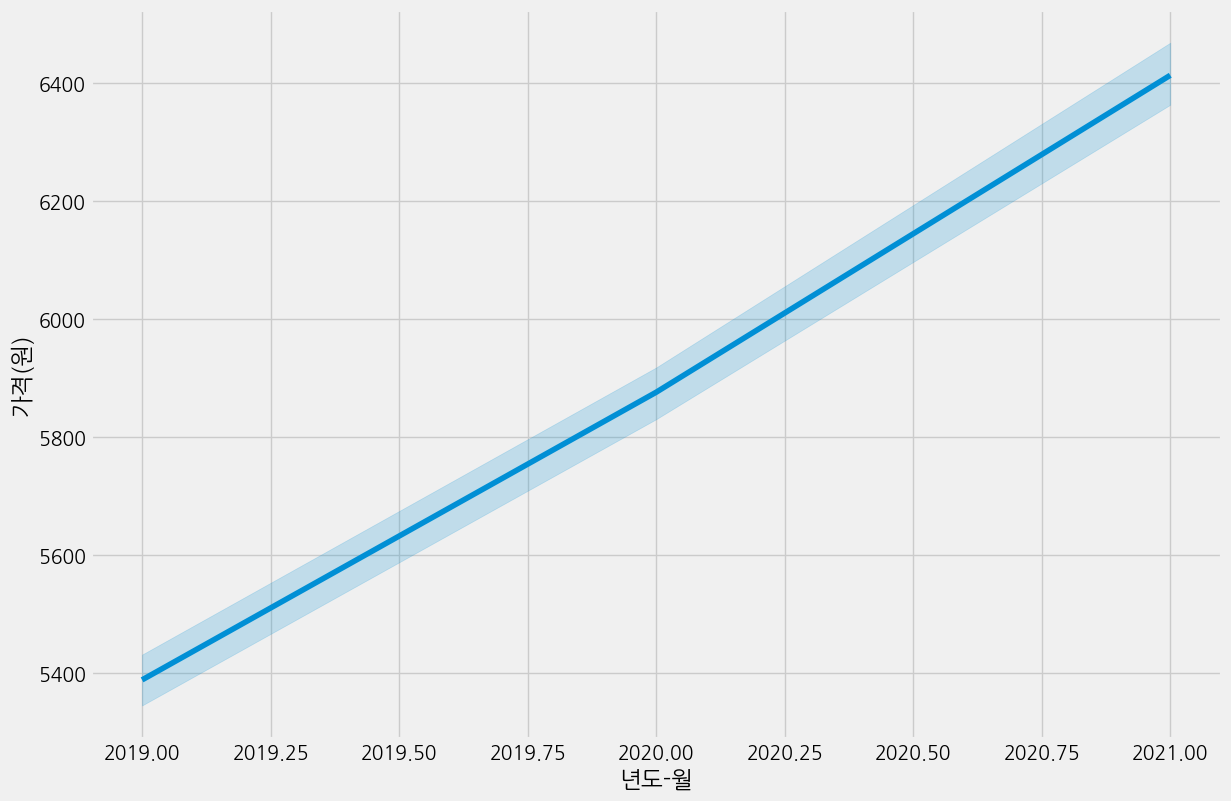

In [ ]:
# 연도 - 가격별로 시각화 
plt.figure(figsize = (13,9))
sns.lineplot(data = df, x='년도-월', y = '가격(원)')
plt.show()

# 추수 시기(추석)에 농산물 가격이 상승하는 것으로 보임
# 코로나 이전과 이후의 데이터가 차이나는 것으로 확인

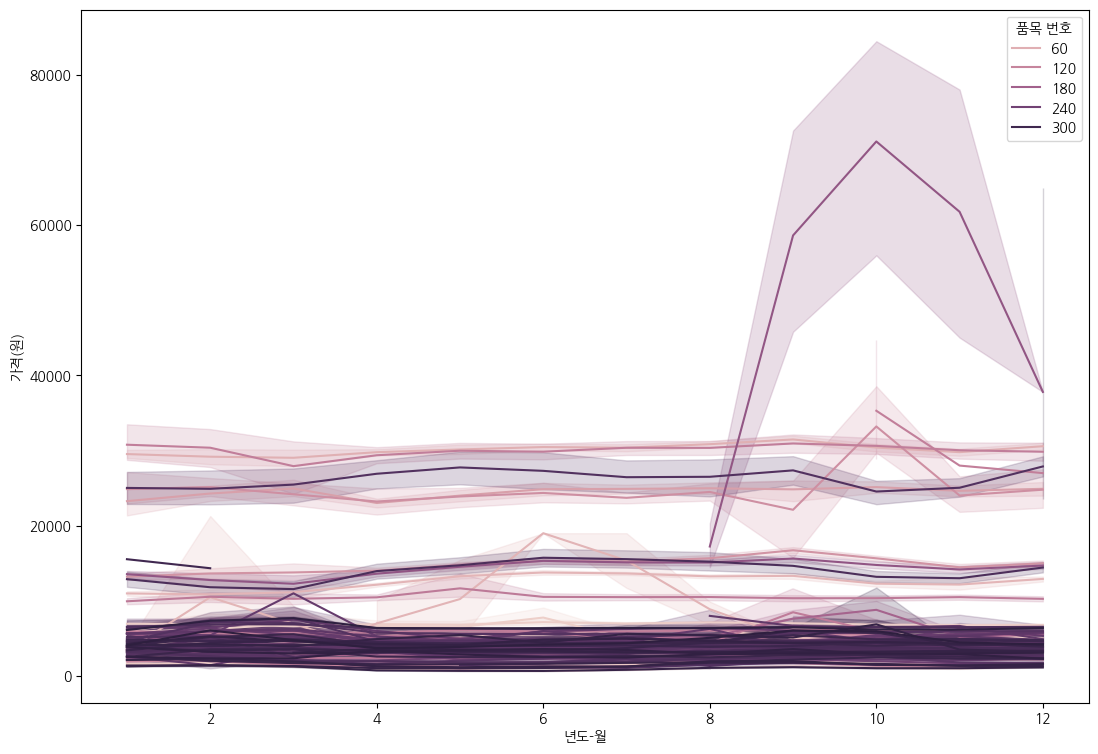

In [ ]:
# 연도 - 가격- 품목 번호별로 시각화
plt.figure(figsize = (13,9))
sns.lineplot(data = df, x='년도-월', y = '가격(원)', hue = '품목 번호')
plt.show()

# 추수 시기(추석)에 농산물 가격이 상승하는 것으로 보임
# 코로나 이전과 이후의 데이터가 차이나는 것으로 확인

In [ ]:
df.columns

Index(['시장/마트 번호', '품목 번호', '가격(원)', '년도-월', '자치구 코드'], dtype='object')

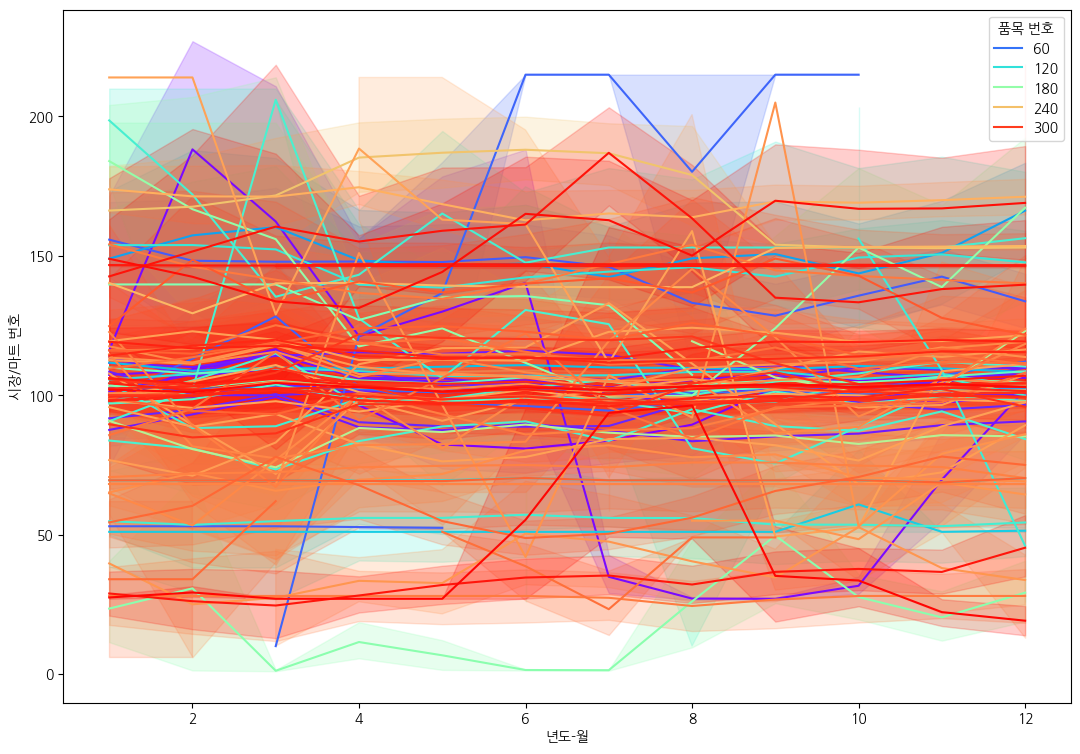

In [ ]:
plt.figure(figsize = (13,9))
sns.lineplot(data = df, x = '년도-월', y = '시장/마트 번호', hue='품목 번호', palette='rainbow')
plt.show()

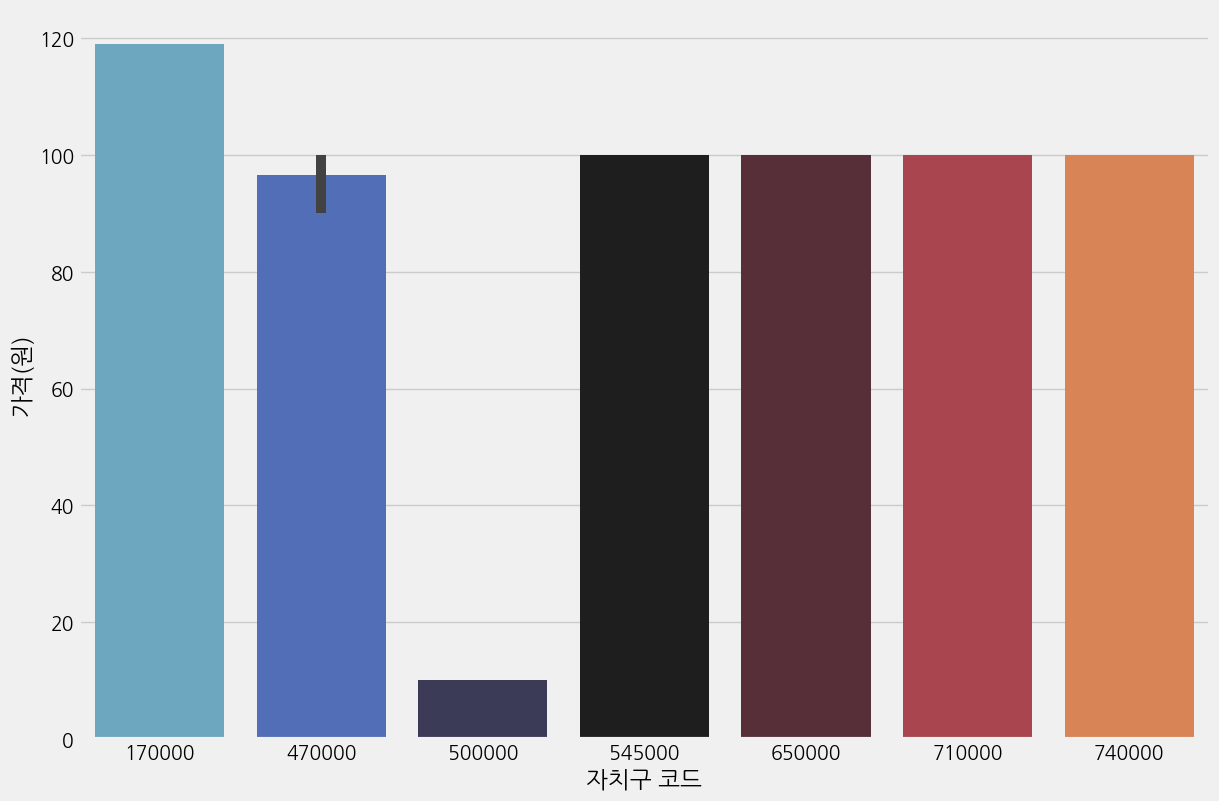

In [ ]:
plt.figure(figsize = (13,9))
sns.barplot(data = df.head(10), x = '자치구 코드', y = '가격(원)',palette='icefire')
plt.show()

In [ ]:
df_new = df.rename(columns={'년도-월': '월'})
df_new

,시장/마트 번호,품목 번호,가격(원),월,자치구 코드
70063,213,119,10,7,500000
261572,214,312,90,5,470000
243730,102,25,100,2,470000
65247,146,310,100,8,710000
87660,114,311,100,6,545000
...,...,...,...,...,...
244208,45,50,210000,2,680000
179632,40,58,260520,7,500000
92710,63,58,288200,5,170000
148594,10,256,310000,10,170000


In [ ]:
# X,y 를 다르게 구분해서 훈련 시작

X = df.drop('가격(원)', axis = 1)
y = df['가격(원)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
# df.reset_index()
# df

In [ ]:
# df.index # 인덱스를 년도-월로 할 예정

In [ ]:
# df.set_index('년도-월', inplace = True)

# 선형회귀

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = model.predict(X_test)
pred

array([9769.59226365, 4180.26298794, 9635.50662691, ..., 4463.97463911,
       3505.03420282, 3985.49368705])

## 모델 평가

In [ ]:
comparison = pd.DataFrame({
    'actual': y_test, # 실제값
    'pred': pred
}) 
comparison

,actual,pred
241395,6980,9769.592264
64424,6000,4180.262988
214799,5480,9635.506627
174404,3000,5121.111676
167169,5933,5086.720128
...,...,...
55507,2990,6317.701004
139266,2000,9403.390821
113362,5980,4463.974639
12758,4990,3505.034203


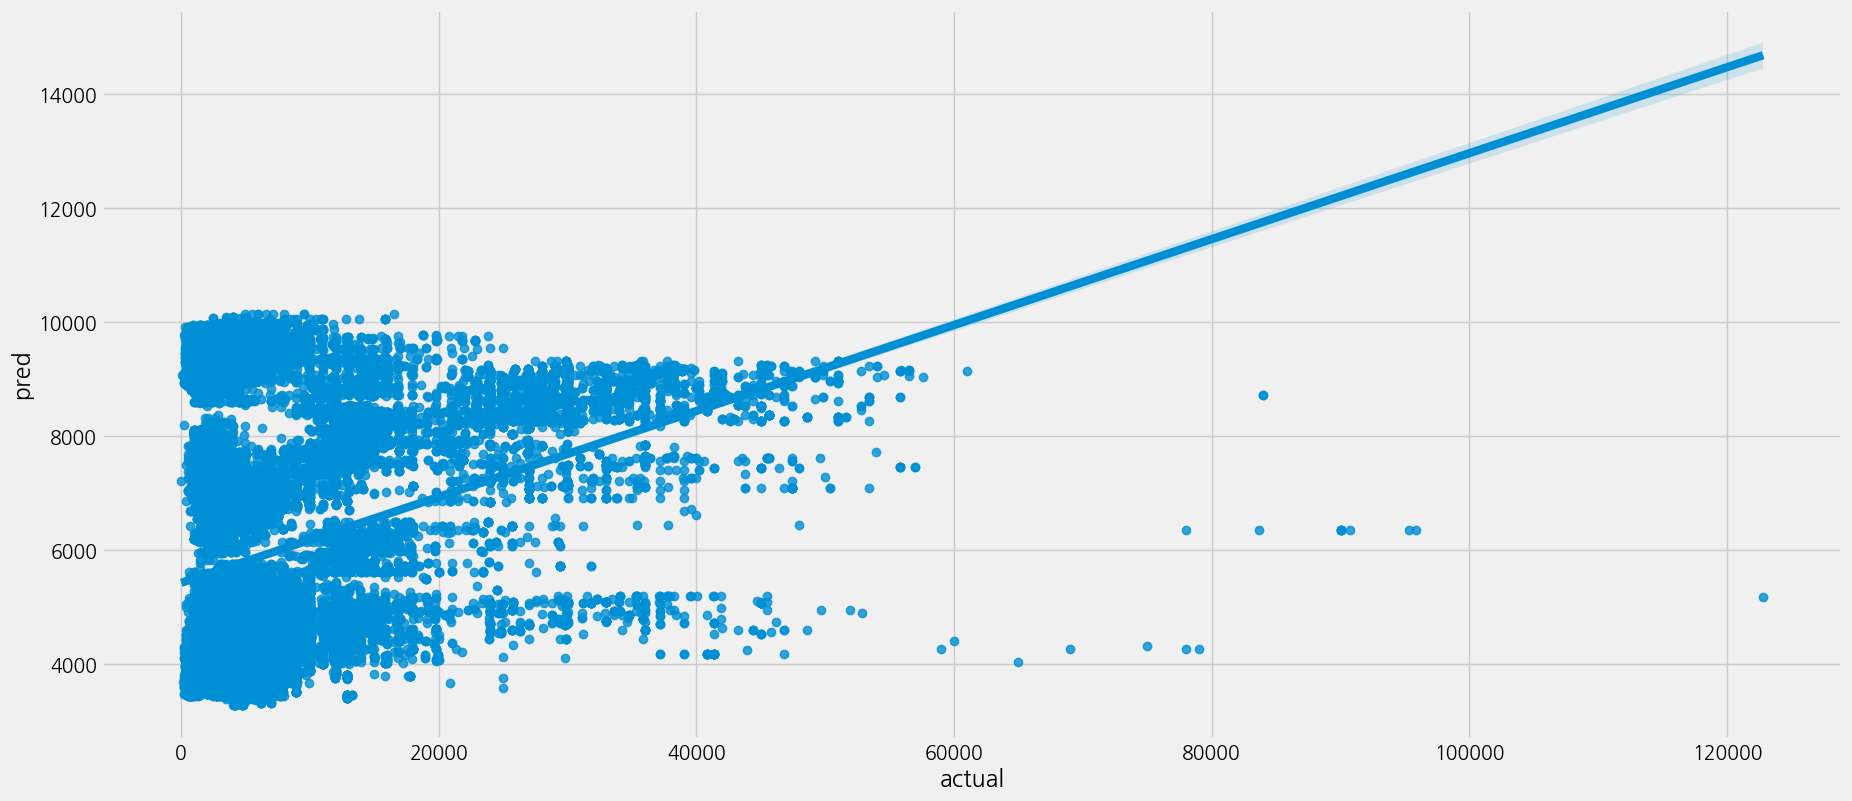

In [ ]:
plt.figure(figsize=(20, 9))
sns.regplot(x = 'actual', y= 'pred', data = comparison)
plt.show()

## 정확도 평가


In [ ]:
mean_squared_error(y_test, pred)

52898615.34108408

In [ ]:
# rmse
mean_squared_error(y_test, pred) ** 0.5

7273.1434291566175

In [ ]:
model.score(X_train, y_train) # R²

0.07281826867438645

In [ ]:
model.coef_

array([-9.61689124e-01, -1.84234753e+01,  3.48447634e+02,  6.81540467e-04])

In [ ]:
model.coef_.shape

(4,)

# DecisionTreeRegressor

In [ ]:
# 모델 설정
model = DecisionTreeRegressor(random_state=10, max_depth = 500)

In [ ]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
pred

array([6980.        , 6142.85714286, 6394.16666667, ..., 5980.        ,
       5708.75      , 4162.22222222])

In [ ]:
# mse 평가
mean_squared_error(y_test, pred)

5933881.17072703

In [ ]:
# rmse 평가
mean_squared_error(y_test, pred, squared=False)

2435.955904922548

In [ ]:
# mae 평가

mean_absolute_error(y_test, pred)

1036.2852649201816

In [ ]:
model.score(X_train, y_train) # R²
# 0.89점

0.8952054985740853

## 시각화

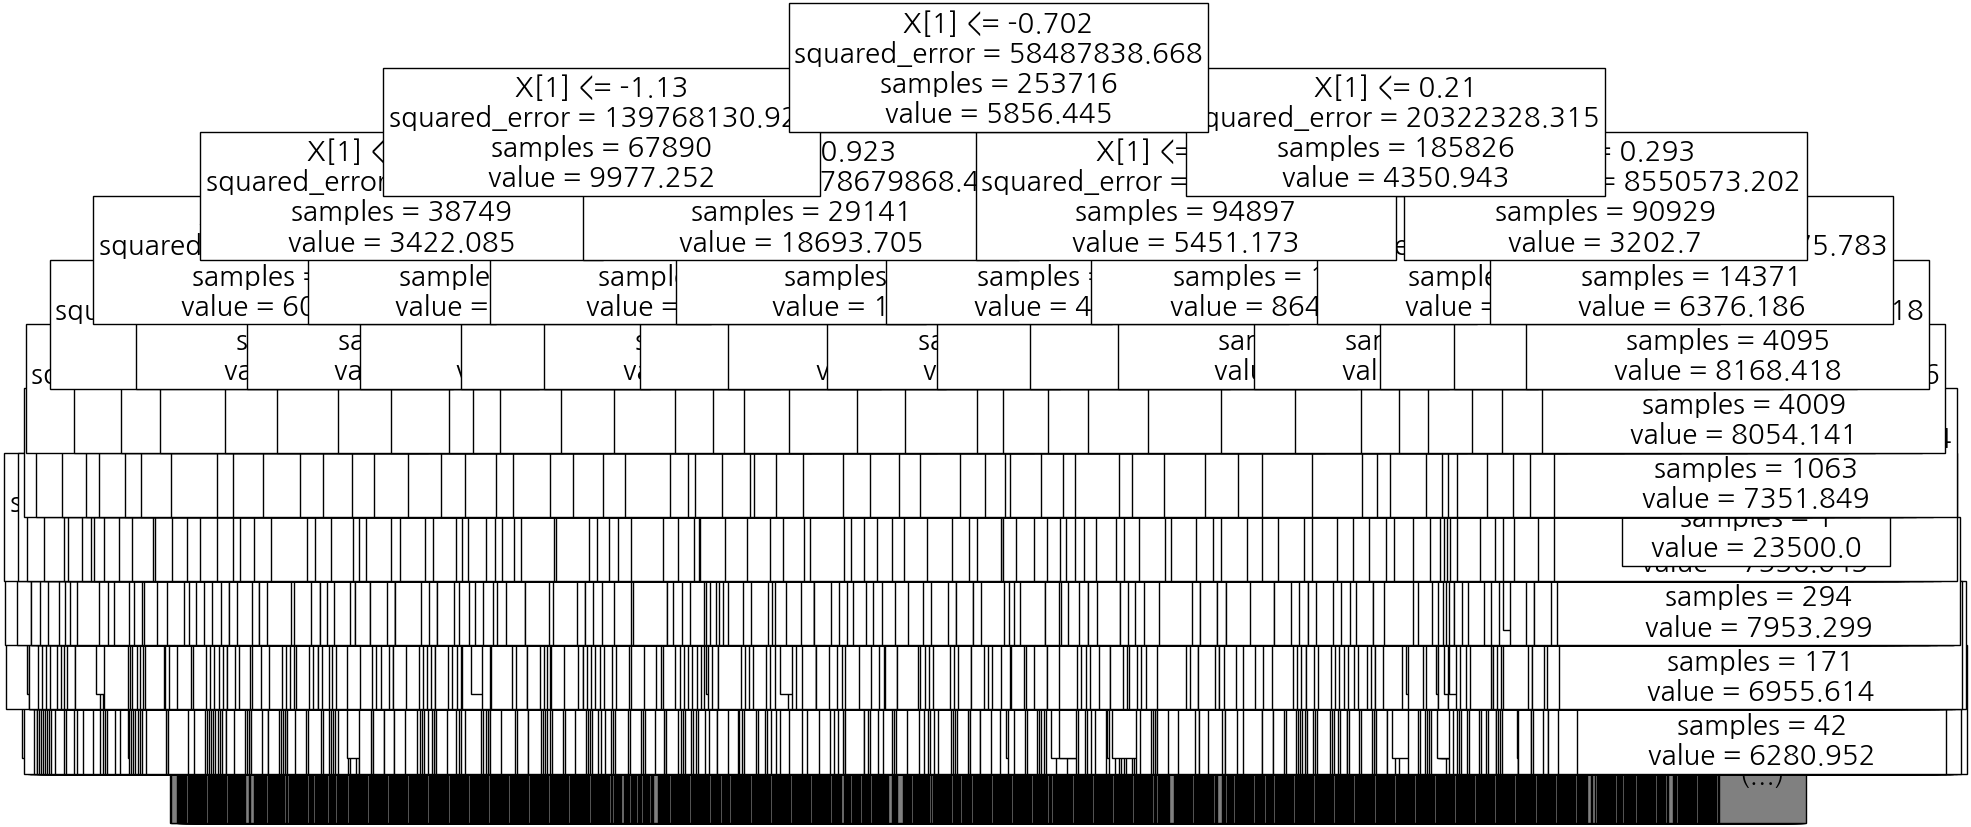

In [ ]:
plt.figure(figsize=(20, 10)) # 그래프 크기 설정
plot_tree(model, max_depth=10, fontsize=20)
plt.show() # 로딩시간 다수에 주의 (10분)

In [ ]:
# 로지스틱 회귀 사용

%%time
model = LogisticRegression()

model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
# probability
pred_proba = model.predict_proba(X_test)
pred_proba

In [ ]:
# mse -> 실제값, 예측값
mean_squared_error(y_test, pred)

In [ ]:
# rmse
mean_squared_error(y_test, pred, squared=False)

In [ ]:
# 학습시킨 독립변수, 종속변수
model.score(X_train, y_train) # R²

# Ridge 회귀

In [ ]:
# Ridge회귀 시작
# rmse 구함
ridge = Ridge(alpha = 10)

neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv = 9) # cv 추후 변경
neg_mse_scores

array([-3.64254055e+07, -3.10059639e+07, -2.23219159e+07, -1.48678221e+07,
       -9.19004341e+06, -5.66829623e+06, -4.18200643e+06, -1.43699268e+07,
       -5.25858170e+08])

In [ ]:
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse

6040.424866017684

In [ ]:
print('개별 negative mse scores:', np.round(neg_mse_scores),
      '\n개별 rmse scores:', np.round(rmse_scores,3), '\n평균 RMSE: {0:.3F}'.format(avg_rmse) )

개별 negative mse scores: [-3.6425405e+07 -3.1005964e+07 -2.2321916e+07 -1.4867822e+07
 -9.1900430e+06 -5.6682960e+06 -4.1820060e+06 -1.4369927e+07
 -5.2585817e+08] 
개별 rmse scores: [ 6035.346  5568.3    4724.607  3855.881  3031.508  2380.818  2044.995
  3790.769 22931.598] 
평균 RMSE: 6040.425


In [ ]:
alphas = [1, 10, 50, 100]
for alpha in alphas :
   ridge = Ridge(alpha = alpha)

   neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv = 9)
   avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
   print('alpha {0}일때 9fold의 평균 rmse: {1:.3f}'.format(alpha, avg_rmse))

alpha 1일때 9fold의 평균 rmse: 6040.425
alpha 10일때 9fold의 평균 rmse: 6040.425
alpha 50일때 9fold의 평균 rmse: 6040.425
alpha 100일때 9fold의 평균 rmse: 6040.425


## 시각화

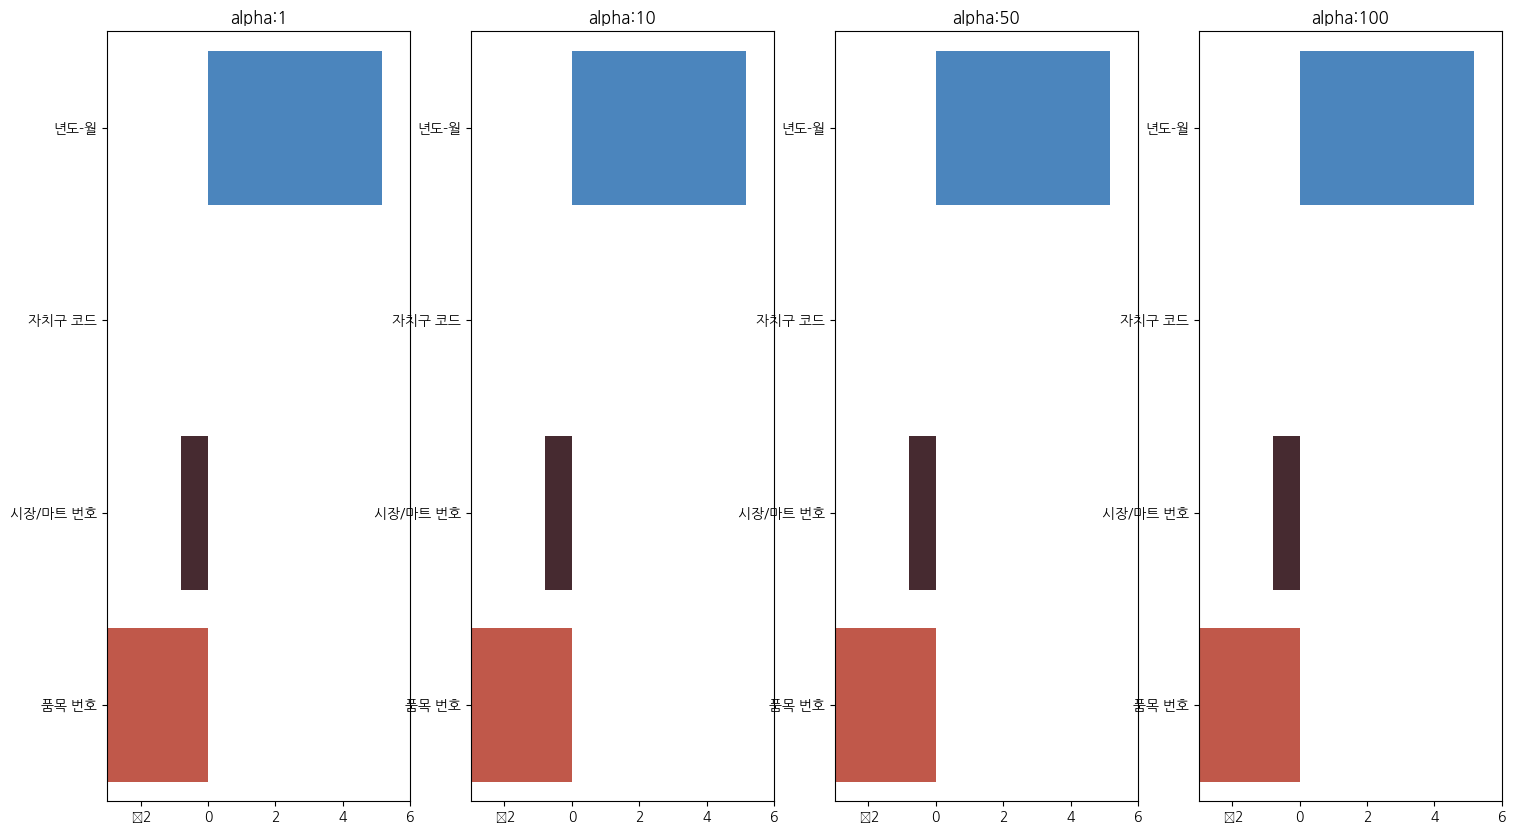

In [ ]:
# alpha (0~100)에 따른 피처별 회귀 계수를 데이터프레임으로 표시

fig, axs = plt.subplots(figsize=(18,10), nrows=1, ncols=4)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
   ridge = Ridge(alpha = alpha)
   ridge.fit(X, y)
   coeff = pd.Series(data=ridge.coef_, index = X.columns)
   colname = 'alpha:'+str(alpha)
   coeff_df[colname]=coeff

   coeff = coeff.sort_values(ascending  =False)
   axs[pos].set_title(colname)
   axs[pos].set_xlim(-3, 6)
   sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos], palette = 'icefire')

plt.show()

In [ ]:
ridge_alphas = [0, 10, 50, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df

,alpha:1,alpha:10,alpha:50,alpha:100
시장/마트 번호,-0.795058,-0.795058,-0.795058,-0.795058
품목 번호,-18.630785,-18.630785,-18.630784,-18.630784
년도-월,5.176074,5.176060,5.175998,5.175921
자치구 코드,0.000645,0.000645,0.000645,0.000645


In [ ]:
ridge.score(X_train, y_train)

0.0715134482280465

# LightGBM

In [3]:
#LightGBM 시도

# # 사용할 params정의
params = {"n_estimators" : [100, 500, 1000],"learning_rate" : [0.01, 0.05, 0.1, 0.3]
          ,"lambda_l1" : [0, 10, 20],"lambda_l2" : [0, 10, 20],"max_depth" : [5, 10, 15, 20],"subsample": [0.6, 0.8, 1]}

## RandomSearchCV 적용

In [ ]:
model = LGBMRegressor(random_state = 100)
new_model = RandomizedSearchCV(model,
      param_distributions = params, 
      cv = 9,
      random_state=100, n_jobs = -1)

In [ ]:
new_model.fit(X_train, y_train) # 시간 소요 체크

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


RandomizedSearchCV(cv=9, estimator=LGBMRegressor(random_state=100), n_jobs=-1,
                   param_distributions={'lambda_l1': [0, 10, 20],
                                        'lambda_l2': [0, 10, 20],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': [0.6, 0.8, 1]},
                   random_state=100)

In [ ]:
new_model.best_score_ # 최적의 점수계산

0.8681272044157713

In [2]:
new_model.best_params_

NameError: ignored

## 결과물

In [ ]:
cv_result = pd.DataFrame(new_model.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,param_lambda_l2,param_lambda_l1,...,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,mean_test_score,std_test_score,rank_test_score
0,3.017921,0.169432,0.288176,0.030013,0.6,100,5,0.1,20,10,...,0.845427,0.851957,0.785216,0.800657,0.786604,0.849835,0.858758,0.830591,0.028709,8
1,28.007245,2.259584,6.762173,0.896030,0.8,1000,5,0.1,0,0,...,0.887037,0.888862,0.820199,0.840730,0.822515,0.887386,0.891832,0.868127,0.029148,1
2,24.492097,2.702006,5.387767,1.545537,1,1000,15,0.05,20,0,...,0.885489,0.887878,0.820168,0.839645,0.822964,0.886451,0.890651,0.867283,0.028664,3
3,21.523842,2.057874,4.704290,0.569973,1,1000,10,0.05,0,0,...,0.886392,0.888820,0.820615,0.840197,0.823779,0.887091,0.891647,0.868060,0.028773,2
4,3.476124,0.451347,0.301402,0.036406,0.8,100,10,0.1,20,10,...,0.861654,0.865677,0.797725,0.816487,0.800217,0.865377,0.870730,0.844869,0.028979,7
5,4.057838,0.693986,0.229167,0.056001,0.8,100,5,0.01,10,20,...,0.687401,0.690379,0.633658,0.641796,0.630205,0.683243,0.695578,0.669487,0.024840,10
6,16.394566,0.959456,2.233182,0.272518,1,500,20,0.01,20,10,...,0.845560,0.849927,0.783044,0.800229,0.785709,0.848904,0.856632,0.829287,0.028642,9
7,3.553037,0.690733,0.330078,0.136035,0.8,100,20,0.3,10,0,...,0.881781,0.884997,0.816821,0.834272,0.820093,0.883246,0.887429,0.863825,0.028832,4
8,3.339980,0.463820,0.311738,0.058094,0.8,100,20,0.1,20,20,...,0.864548,0.867878,0.799625,0.818753,0.803183,0.866121,0.871962,0.847024,0.028776,6
9,10.984048,0.571270,1.647039,0.256614,0.6,500,10,0.05,0,20,...,0.879126,0.881145,0.813598,0.833263,0.817339,0.880844,0.885592,0.861129,0.028710,5


In [ ]:
pred = new_model.predict(X_test)

In [ ]:
# mse 평가
mean_squared_error(y_test, pred)

5755554.830311395

In [ ]:
# rmse 평가
mean_squared_error(y_test, pred, squared=False)

2399.0737442420136

In [ ]:
new_model.score(X_train, y_train)

0.8730338231771096

## 시각화

In [ ]:
# 테이블로 평가
comparison = pd.DataFrame({
    'actual': y_test, # 실제값
    'pred': pred
}) 
comparison

,actual,pred
241395,6980,5996.373106
64424,6000,5933.799055
214799,5480,6210.553027
174404,3000,2788.949033
167169,5933,8089.704012
...,...,...
55507,2990,2714.761403
139266,2000,2192.385587
113362,5980,4828.699760
12758,4990,6447.632289


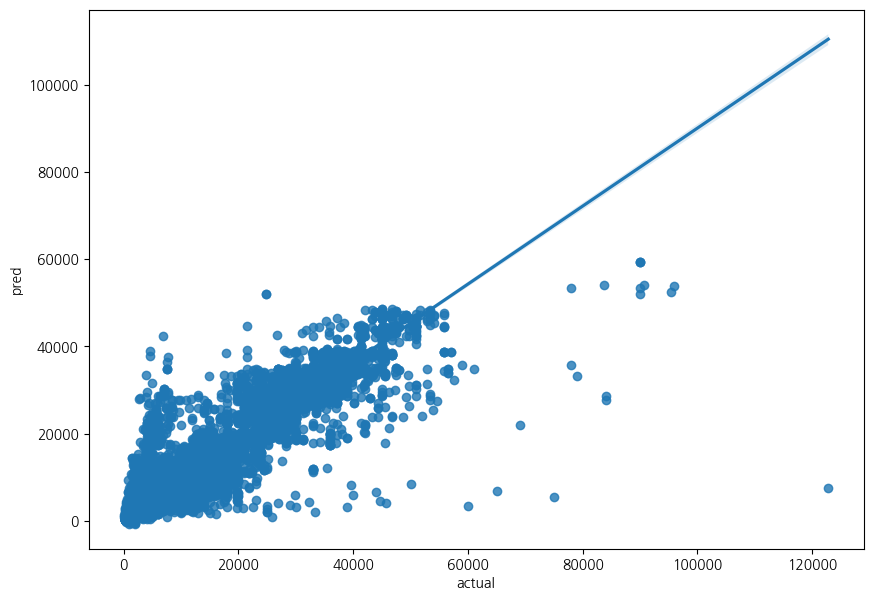

In [ ]:
# regplot 제작
plt.figure(figsize=(10, 7))
sns.regplot(x = 'actual', y= 'pred', data = comparison)
plt.show()

# RandomForest 회귀 & kfold 적용

In [ ]:
# 랜덤 포레스트 시작 + Kfold 5개
from sklearn.model_selection import KFold
from sklearn import ensemble
kf = KFold(n_splits = 5)

In [ ]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
list(kf.split(X))

[(array([ 63429,  63430,  63431, ..., 317142, 317143, 317144]),
  array([    0,     1,     2, ..., 63426, 63427, 63428])),
 (array([     0,      1,      2, ..., 317142, 317143, 317144]),
  array([ 63429,  63430,  63431, ..., 126855, 126856, 126857])),
 (array([     0,      1,      2, ..., 317142, 317143, 317144]),
  array([126858, 126859, 126860, ..., 190284, 190285, 190286])),
 (array([     0,      1,      2, ..., 317142, 317143, 317144]),
  array([190287, 190288, 190289, ..., 253713, 253714, 253715])),
 (array([     0,      1,      2, ..., 253713, 253714, 253715]),
  array([253716, 253717, 253718, ..., 317142, 317143, 317144]))]

In [ ]:
X = df.drop('가격(원)', axis = 1)
y = df['가격(원)']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size = 0.2,
                                                      random_state = 10)
list1 = []
list2 = []
nTreeList = range(1, 100, 10)

for i in nTreeList:
    depth = None
    maxFeat = 4 
    model = ensemble.RandomForestRegressor(n_estimators=i,
                    max_depth=depth, max_features=maxFeat,
                    oob_score=False, random_state=11)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    list1.append(mean_squared_error(y_test, pred))
    list2.append(mean_squared_error(y_test, pred, squared = False))
    
print("MSE")
print(list1)
print('RMSE')
print(list2)

MSE
[6512103.165290936, 5863522.936521331, 5882472.108503981, 5883435.317850183, 5858910.9036487, 5849114.618530003, 5864403.17383705, 5845615.335398273, 5832033.049151174, 5814893.2653053375]
RMSE
[2551.8822788857124, 2421.4712338826844, 2425.380817212831, 2425.579377767337, 2420.5187261512147, 2418.4942874710296, 2421.6529837772073, 2417.7707367321395, 2414.960258296433, 2411.4089792702807]


In [ ]:
model.score(X_train, y_train)

0.894728752567511

## 시각화

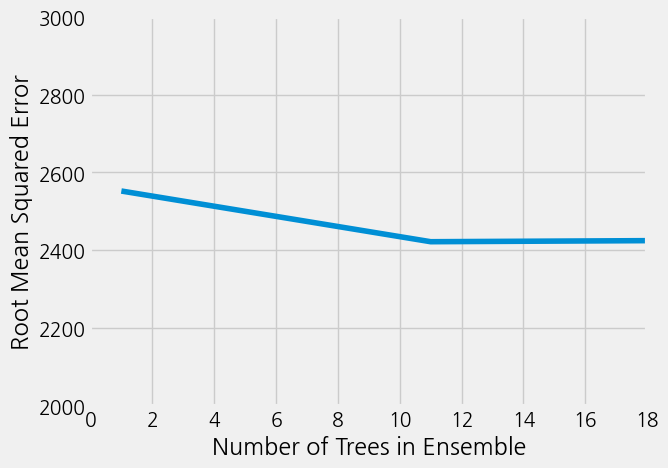

In [ ]:
plt.plot(nTreeList, list2)
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Root Mean Squared Error')

plt.xlim(0, 18, 2)
plt.ylim(2000, 3000, 300)

plt.show()